# Bus Ridership Prediction Tool

Our tool predicts bus ridership given FHV ridership for that month.

Thanks to the following groups for making this work possible:
- [CrossCompute](https://crosscompute.com) for providing mentors and tutorials
- [Tech Incubator at CUNY Queens College](https://techincubatorqc.com) for guiding the student teams
- [NYC Open Data](https://opendata.cityofnewyork.us) for publishing datasets
- [NYC Mayor's Office of Data Analytics](http://www.nyc.gov/analytics) for organizing NYC Open Data Week

{fhv_count : Monthly For-Hire Vehicles Rides ? Specify the monthly FHV count.)

In [1]:
#CrossCompute
fhv_table_path = 'monthly_FHV_count_crossval.csv'
target_folder = '/tmp'

In [2]:
import pandas as pd
fhv_table = pd.read_csv(fhv_table_path)

In [3]:
# Load model
from pickle import load
model = load(open('model1.pkl', 'rb')) 
model

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [4]:
#Run model
X = fhv_table.values
y = model.predict(X)

In [5]:
# Create output table
output = pd.DataFrame(columns = ["Predicted Bus Rides", "Actual Bus Rides"])
output['Predicted Bus Rides'] = y
output['Actual Bus Rides'] = pd.read_csv('monthly_bus_count.csv')
mean_abs_error = (output['Predicted Bus Rides'] - output['Actual Bus Rides']).mean()

### Comparison to Actual Data

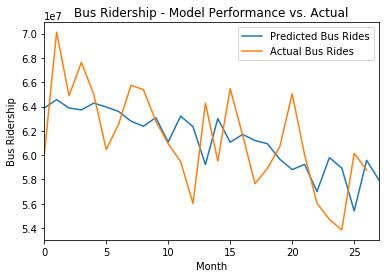

In [6]:
#Render plot depicting model absolute error
%matplotlib inline

axes = output.plot(kind = 'line', title = 'Bus Ridership - Model Performance vs. Actual')
axes.set_xlabel("Month")
axes.set_ylabel("Bus Ridership")

In [7]:
# Save file to target folder to include it in the result download
target_path = target_folder + '/bus1.png'
figure = axes.get_figure()
figure.savefig(target_path)
print(f'bus1_image_path = {target_path}')

bus1_image_path = /tmp/bus1.png


In [8]:
from os.path import join
lines = []
lines.append('Mean Absolute Error = %s' % mean_abs_error)
result_text = '\n'.join(lines)
result_text_path = join(target_folder, 'result.txt')
open(result_text_path, 'wt').write(result_text)
print('result_text_path = %s' % result_text_path)

result_text_path = /tmp/result.txt


### Output

In [10]:
target_path = target_folder + '/out.csv'
output.to_csv(target_path, index = False)
print(f'output_table_path = {target_path}')

output_table_path = /tmp/out.csv
